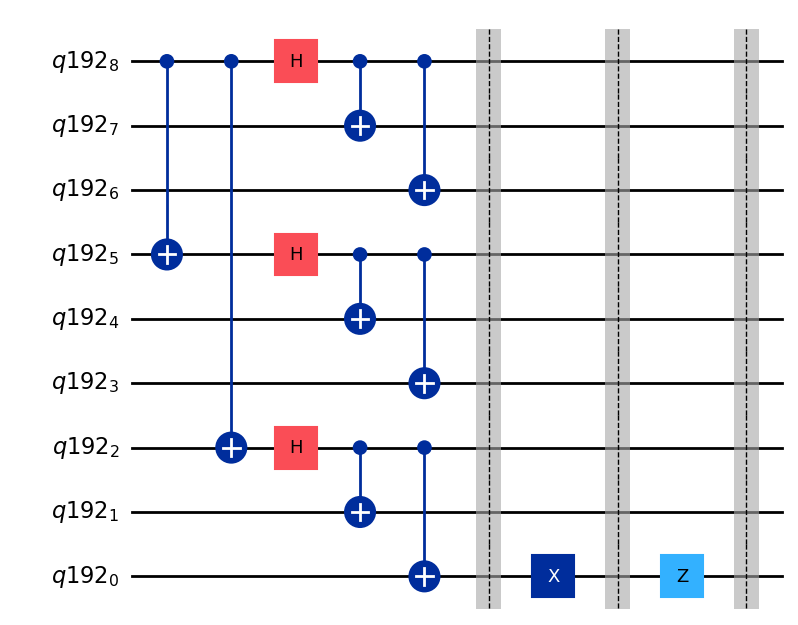

In [42]:
from qiskit import QuantumRegister, QuantumCircuit

state = 1
ancilla = 2
qubits = state + ancilla
syndrome = 2 * qubits
qubits += syndrome
qreg = QuantumRegister(qubits)
qc = QuantumCircuit(qreg)

# note the order of the qubits are reversed in the qiskit
# initialize the state
# qc.h(qreg[2])
# qc.barrier()
# apply encoding circuit
qc.cx(qreg[8], qreg[5])
qc.cx(qreg[8], qreg[2])
qc.h(qreg[8])
qc.h(qreg[5])
qc.h(qreg[2])
qc.cx(qreg[8], qreg[7])
qc.cx(qreg[8], qreg[6])
qc.cx(qreg[5], qreg[4])
qc.cx(qreg[5], qreg[3])
qc.cx(qreg[2], qreg[1])
qc.cx(qreg[2], qreg[0])
qc.barrier()
# introduce a bit flip error
qc.x(qreg[0])
qc.barrier()
# introduce a phase flip error
qc.z(qreg[0])
qc.barrier()

qc.draw(output="mpl", reverse_bits=True)

In [43]:
from qiskit.primitives import StatevectorEstimator as Estimator
from qiskit.quantum_info import SparsePauliOp

z0z1 = SparsePauliOp(["ZZIIIIIII"])
z1z2 = SparsePauliOp(["IZZIIIIII"])
z3z4 = SparsePauliOp(["IIIZZIIII"])
z4z5 = SparsePauliOp(["IIIIZZIII"])
z6z7 = SparsePauliOp(["IIIIIIZZI"])
z7z8 = SparsePauliOp(["IIIIIIIZZ"])
estimator = Estimator()
job = estimator.run(
    [
        (qc, z0z1),
        (qc, z1z2),
        (qc, z3z4),
        (qc, z4z5),
        (qc, z6z7),
        (qc, z7z8),
    ]
)

expectation = [f"{result.data.evs:.0f}" for result in job.result()]
expectation

['1', '1', '1', '1', '1', '-1']

In [44]:
from qiskit.primitives import StatevectorEstimator as Estimator
from qiskit.quantum_info import SparsePauliOp

x0tox5 = SparsePauliOp(["XXXXXXIII"])
x3tox8 = SparsePauliOp(["IIIXXXXXX"])

estimator = Estimator()
job = estimator.run(
    [
        (qc, x0tox5),
        (qc, x3tox8),
    ]
)

expectation = [f"{result.data.evs:.0f}" for result in job.result()]
expectation

['1', '-1']

In [78]:
from qiskit import QuantumRegister, QuantumCircuit
from qiskit.circuit.library import MCMT, XGate


def encoding(n=17):
    qreg = QuantumRegister(n)
    qc = QuantumCircuit(qreg)
    qc.cx(qreg[-1], qreg[-4])
    qc.cx(qreg[-1], qreg[-7])
    qc.barrier()
    qc.h(qreg[-1])
    qc.h(qreg[-4])
    qc.h(qreg[-7])
    qc.barrier()
    qc.cx(qreg[-1], qreg[-2])
    qc.cx(qreg[-1], qreg[-3])
    qc.cx(qreg[-4], qreg[-5])
    qc.cx(qreg[-4], qreg[-6])
    qc.cx(qreg[-7], qreg[-8])
    qc.cx(qreg[-7], qreg[-9])
    qc.barrier()
    return qc


def bit_flip_syndrome():
    qreg = QuantumRegister(17)
    qc = QuantumCircuit(qreg)
    qc.cx(qreg[-1], qreg[7])
    qc.cx(qreg[-2], qreg[7])
    qc.cx(qreg[-2], qreg[6])
    qc.cx(qreg[-3], qreg[6])
    qc.barrier()
    qc.cx(qreg[-4], qreg[5])
    qc.cx(qreg[-5], qreg[5])
    qc.cx(qreg[-5], qreg[4])
    qc.cx(qreg[-6], qreg[4])
    qc.barrier()
    qc.cx(qreg[-7], qreg[3])
    qc.cx(qreg[-8], qreg[3])
    qc.cx(qreg[-8], qreg[2])
    qc.cx(qreg[-9], qreg[2])
    qc.barrier()
    return qc


def phase_flip_syndrome():
    qreg = QuantumRegister(17)
    qc = QuantumCircuit(qreg)
    qc.h(qreg[1])
    qc.h(qreg[0])
    gate = MCMT(XGate(), 1, 6)
    qc.append(gate, [1] + [-1, -2, -3, -4, -5, -6])
    qc.append(gate, [0] + [-4, -5, -6, -7, -8, -9])
    qc.h(qreg[1])
    qc.h(qreg[0])
    qc.barrier()
    return qc


def decoding():
    qreg = QuantumRegister(17)
    qc = QuantumCircuit(qreg)
    qc.cx(qreg[-1], qreg[-2])
    qc.cx(qreg[-1], qreg[-3])
    qc.ccx(qreg[-3], qreg[-2], qreg[-1])
    qc.barrier()
    qc.cx(qreg[-4], qreg[-5])
    qc.cx(qreg[-4], qreg[-6])
    qc.ccx(qreg[-6], qreg[-5], qreg[-4])
    qc.barrier()
    qc.cx(qreg[-7], qreg[-8])
    qc.cx(qreg[-7], qreg[-9])
    qc.ccx(qreg[-9], qreg[-8], qreg[-7])
    qc.barrier()
    qc.h(qreg[-1])
    qc.h(qreg[-4])
    qc.h(qreg[-7])
    qc.barrier()
    qc.cx(qreg[-1], qreg[-4])
    qc.cx(qreg[-1], qreg[-7])
    qc.ccx(qreg[-7], qreg[-4], qreg[-1])
    qc.barrier()
    return qc

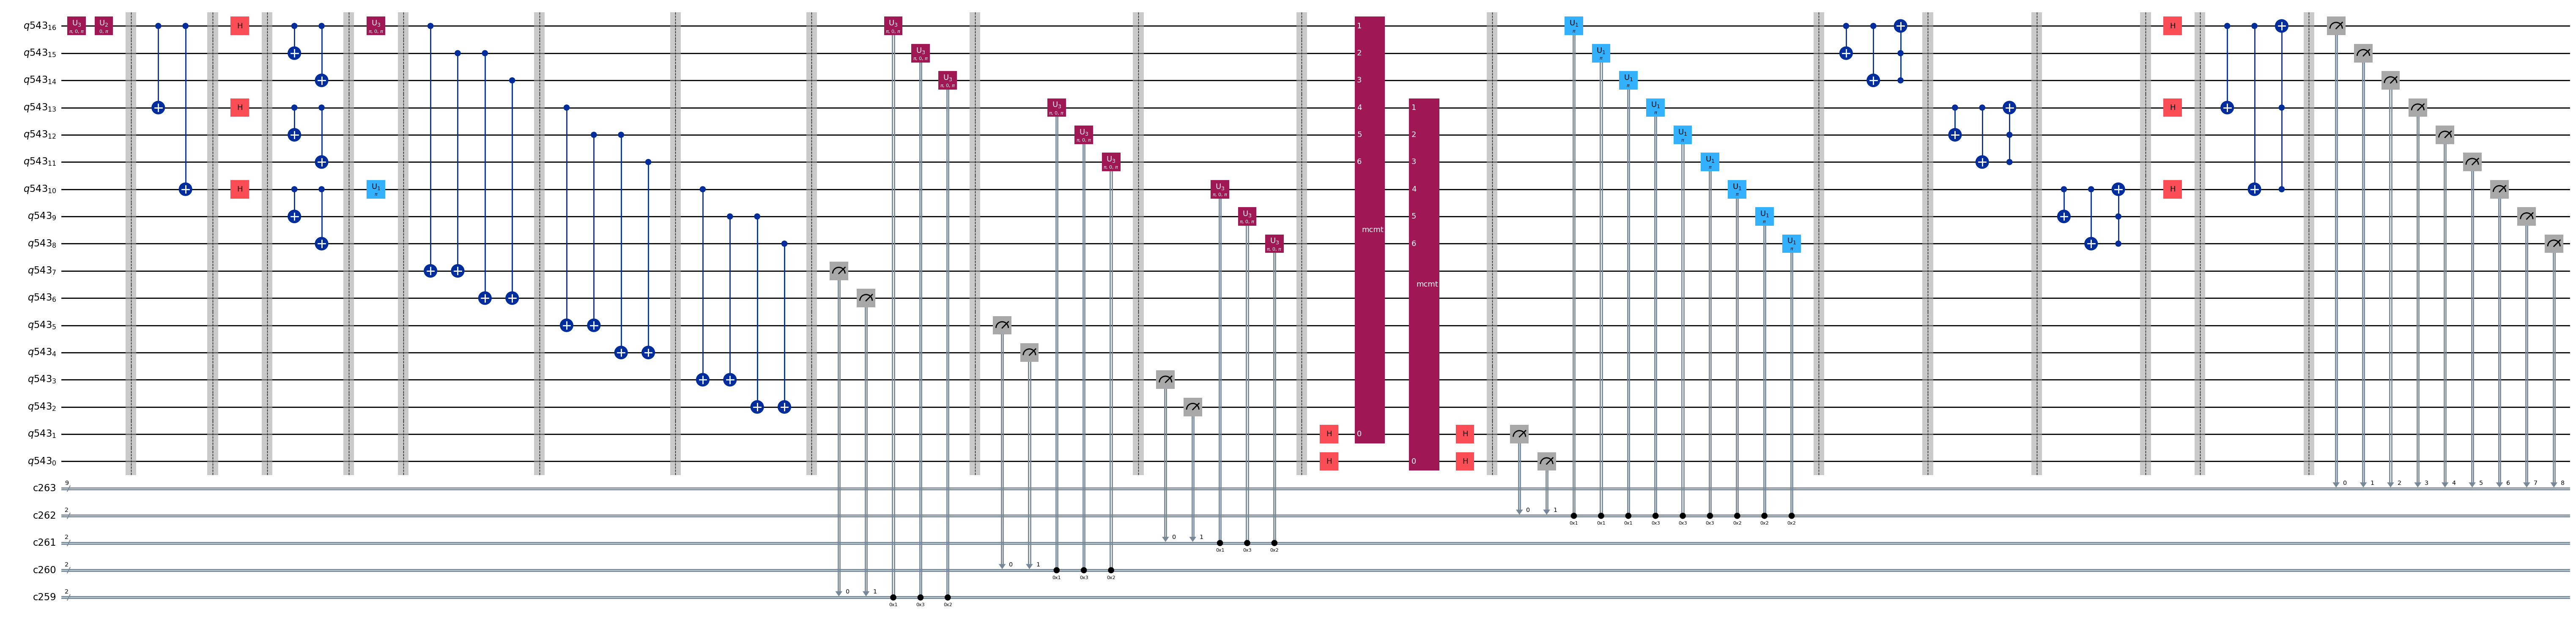

In [105]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

qubits = 9
bit_ancilla = 6
phase_ancilla = 2
qreg = QuantumRegister(qubits + bit_ancilla + phase_ancilla)
b0_reg = ClassicalRegister(2)
b1_reg = ClassicalRegister(2)
b2_reg = ClassicalRegister(2)
phase_reg = ClassicalRegister(phase_ancilla)
state_reg = ClassicalRegister(qubits)
qc = QuantumCircuit(qreg, b0_reg, b1_reg, b2_reg, phase_reg, state_reg)

# note the order of the qubits are reversed in the qiskit
# initialize the state
qc.x(qreg[-1])
qc.h(qreg[-1])
# qc.ry(2 * np.arccos(np.sqrt(1 / 3)), qreg[-1])
qc.barrier()
# apply encoding circuit
qc.append(encoding(), qreg)
# introduce an error
qc.x(qreg[-1])
qc.z(qreg[-7])
qc.barrier()
# apply syndrome measurement for bit flip
qc.append(bit_flip_syndrome(), qreg)
# correct the bit flip error
qc.measure([qreg[7], qreg[6]], b0_reg)
qc.x(qreg[-1]).c_if(b0_reg, 1)
qc.x(qreg[-2]).c_if(b0_reg, 3)
qc.x(qreg[-3]).c_if(b0_reg, 2)
qc.barrier()
qc.measure([qreg[5], qreg[4]], b1_reg)
qc.x(qreg[-4]).c_if(b1_reg, 1)
qc.x(qreg[-5]).c_if(b1_reg, 3)
qc.x(qreg[-6]).c_if(b1_reg, 2)
qc.barrier()
qc.measure([qreg[3], qreg[2]], b2_reg)
qc.x(qreg[-7]).c_if(b2_reg, 1)
qc.x(qreg[-8]).c_if(b2_reg, 3)
qc.x(qreg[-9]).c_if(b2_reg, 2)
qc.barrier()
# apply syndrome measurement for phase flip
qc.append(phase_flip_syndrome(), qreg)
# correct the phase flip error
qc.measure([qreg[1], qreg[0]], phase_reg)
qc.z(qreg[-1]).c_if(phase_reg, 1)
qc.z(qreg[-2]).c_if(phase_reg, 1)
qc.z(qreg[-3]).c_if(phase_reg, 1)
qc.z(qreg[-4]).c_if(phase_reg, 3)
qc.z(qreg[-5]).c_if(phase_reg, 3)
qc.z(qreg[-6]).c_if(phase_reg, 3)
qc.z(qreg[-7]).c_if(phase_reg, 2)
qc.z(qreg[-8]).c_if(phase_reg, 2)
qc.z(qreg[-9]).c_if(phase_reg, 2)
qc.barrier()
# apply decoding circuit
qc.append(decoding(), qreg)
# measure the state
# qc.h(qreg[-1])
qc.measure(qreg[-1:-10:-1], state_reg)

qc.decompose().draw(output="mpl", reverse_bits=True, fold=-1)

In [102]:
from qiskit_aer import AerSimulator
from qiskit.compiler import transpile

simulator = AerSimulator()

# transpile the circuit
qc = transpile(qc, simulator)

# execute the circuit and read the results
job = simulator.run(qc, shots=512)

counts = job.result().get_counts()
for outcome in counts.keys():
    print(outcome[::-1], "is observed", counts[outcome], "times")

10 00 00 01 000000000 is observed 253 times
10 00 00 01 100000000 is observed 259 times
